In [12]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# ✅ Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)
datagen.fit(X_train)

In [5]:
# Build  CNN
model = models.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.4),

    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.5),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])




/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:

# Early stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

In [8]:
# Train
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    epochs=60,
                    validation_data=(X_test, y_test),
                    callbacks=[callback],
                    verbose=2)

Epoch 1/60


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 - 58s - 74ms/step - accuracy: 0.3071 - loss: 2.3698 - val_accuracy: 0.4218 - val_loss: 1.7460
Epoch 2/60
782/782 - 32s - 41ms/step - accuracy: 0.4020 - loss: 1.8146 - val_accuracy: 0.4172 - val_loss: 1.8833
Epoch 3/60
782/782 - 33s - 42ms/step - accuracy: 0.4589 - loss: 1.5936 - val_accuracy: 0.4628 - val_loss: 1.6641
Epoch 4/60
782/782 - 33s - 42ms/step - accuracy: 0.5107 - loss: 1.4242 - val_accuracy: 0.5310 - val_loss: 1.4205
Epoch 5/60
782/782 - 32s - 41ms/step - accuracy: 0.5485 - loss: 1.2962 - val_accuracy: 0.5593 - val_loss: 1.3340
Epoch 6/60
782/782 - 32s - 41ms/step - accuracy: 0.5802 - loss: 1.1952 - val_accuracy: 0.5672 - val_loss: 1.3996
Epoch 7/60
782/782 - 33s - 42ms/step - accuracy: 0.6107 - loss: 1.0998 - val_accuracy: 0.6414 - val_loss: 1.0615
Epoch 8/60
782/782 - 32s - 41ms/step - accuracy: 0.6391 - loss: 1.0277 - val_accuracy: 0.6113 - val_loss: 1.1765
Epoch 9/60
782/782 - 32s - 41ms/step - accuracy: 0.6657 - loss: 0.9599 - val_accuracy: 0.6761 - val_loss: 0

In [9]:
# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"✅ Test Accuracy: {test_acc*100:.2f}%")

✅ Test Accuracy: 84.05%


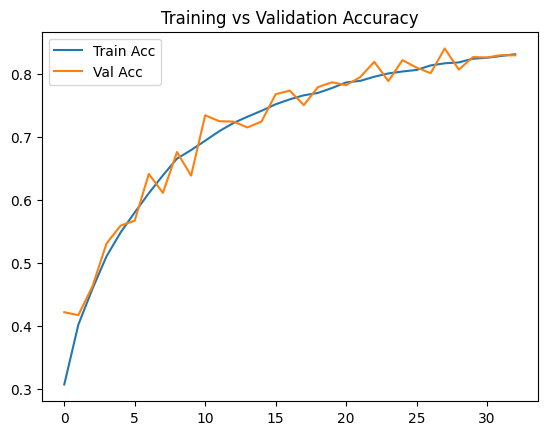

In [10]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.title("Training vs Validation Accuracy"); plt.show()

In [14]:
# Step 10: Save model
model.save('cnn_cifar10_model.h5')
print("✅ Model saved successfully!")

✅ Model saved successfully!


In [15]:
# download model for streamlit
from google.colab import files
files.download('cnn_cifar10_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>